<a href="https://colab.research.google.com/github/AldousSama/Tarea1/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
4000/4000 [==============================] - 23s 5ms/step - loss: 0.2304 - accuracy: 0.9314 - val_loss: 0.1384 - val_accuracy: 0.9553
Epoch 2/50
4000/4000 [==============================] - 19s 5ms/step - loss: 0.1049 - accuracy: 0.9682 - val_loss: 0.0958 - val_accuracy: 0.9690
Epoch 3/50
4000/4000 [==============================] - 18s 4ms/step - loss: 0.0731 - accuracy: 0.9773 - val_loss: 0.0936 - val_accuracy: 0.9710
Epoch 4/50
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0771 - val_accuracy: 0.9762
Epoch 5/50
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0491 - accuracy: 0.9841 - val_loss: 0.0804 - val_accuracy: 0.9767
Epoch 6/50
4000/4000 [==============================] - 20s 5ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 7/50
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0982 - val_ac

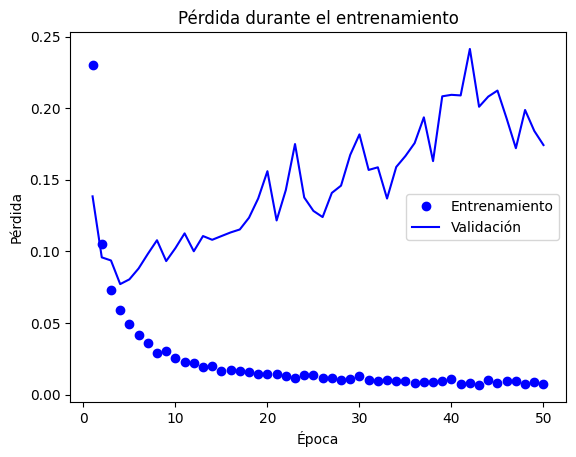

313/313 [==============================] - 1s 2ms/step - loss: 0.1742 - accuracy: 0.9810
Precisión en los datos de prueba: 98.10%


In [3]:
 #Este codigo es una "actualización del anterior solo que implementando keras, por lo que la carga de los datos MNSIT es distinta."
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import time  # Importa el módulo time

# Carga los datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesa los datos
training_images = training_images.reshape((60000, 784))
training_images = training_images.astype('float32') / 255

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255

training_labels = to_categorical(training_labels)
test_labels = to_categorical(test_labels)

# Cremos el modelo de la red neuronal ESTE ES MI PRIMER EXPERIMENTO, DONDE AGREGARE MÁS CAPAS OCULTAS
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=784))  # Aumentamos el número de neuronas y cambiamos la función de activación
model.add(Dense(units=64, activation='relu'))  # Agregamos una capa oculta adicional
model.add(Dense(units=32, activation='relu'))  # Agregamos otra capa oculta
model.add(Dense(units=10, activation='softmax'))

# Aquí lo compilo con crossentropy y el optimizador que había usado
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])  # Cambiamos el optimizador, este es mi SEGUNDO experimento

# Esto es para poder ver cuanto tiempo tarda en entrenar
start_time = time.time()

# Entrena el modelo
history = model.fit(training_images, training_labels, epochs=50, batch_size=15, validation_data=(test_images, test_labels)) #Este es mi tercer TERCER experimento donde cambio el número de epocas

# Registra el tiempo de finalización
end_time = time.time()

# Calcula el tiempo de entrenamiento
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time:.2f} segundos')

# Grafica la historia de la pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Calcula la precisión en los datos de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Precisión en los datos de prueba: {test_accuracy * 100:.2f}%')
